# Seasonal-Trend decomposition using Loess (STL)

In [2]:
import pandas as pd

# Set to see all columns
pd.set_option('display.max_columns', None)

# Set to see all rows
#pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
csv_file = 'data/01_bronze/2018.csv'
df = pd.read_csv(csv_file)
df.shape
#df.info()
#df.head()

(7213446, 28)

In [4]:
# Count total rows with DEB_DELAY = NaN
df.DEP_DELAY.isna().sum()

117234

In [5]:
# Nos quedamos con los DEP_DELAY que tienen datos
df = df[df['DEP_DELAY'].notna()]
df.shape

(7096212, 28)

In [6]:
# Nos quedamos solo con las demoras al partir > 0
#df_dep_delay = df[df['DEP_DELAY']>0]

# O seguimos con el mismo dataset que teníamos pero haciendo una copia
df_dep_delay = df.copy()
df_dep_delay.shape

(7096212, 28)

In [7]:
# calculamos promedio de demora de partida por origen y dia
df_mean_dep_delay = df_dep_delay.groupby(["ORIGIN", "FL_DATE"])["DEP_DELAY"]\
    .mean()\
    .to_frame('MEAN_DEP_DELAY')\

df_mean_dep_delay = df_mean_dep_delay.reset_index()
df_mean_dep_delay

,ORIGIN,FL_DATE,MEAN_DEP_DELAY
0,ABE,2018-01-01,7.833333
1,ABE,2018-01-02,77.375000
2,ABE,2018-01-03,51.333333
3,ABE,2018-01-04,30.125000
4,ABE,2018-01-05,17.375000
...,...,...,...
121460,YUM,2018-12-27,4.250000
121461,YUM,2018-12-28,2.250000
121462,YUM,2018-12-29,3.500000
121463,YUM,2018-12-30,3.750000


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")


# runtime configuration (rc) containing the default styles for every plot element
plt.rcParams['figure.figsize']=(16,6) 

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

In [10]:
#data = df_mean_dep_delay.loc[df_mean_dep_delay['ORIGIN']=='JFK',:]
data = df_mean_dep_delay.set_index(['ORIGIN','FL_DATE'])
data = data.loc['JFK',:]
data.index = pd.to_datetime(data.index)
data

,MEAN_DEP_DELAY
FL_DATE,
2018-01-01,18.311475
2018-01-02,18.047478
2018-01-03,10.893548
2018-01-04,71.066667
2018-01-05,154.356164
...,...
2018-12-27,4.470430
2018-12-28,29.405914
2018-12-29,13.348571


In [12]:
# Frecuencia temporal del indice (es este caso es D = day)
pd.infer_freq(data.index)

'D'

In [14]:
data = data.asfreq(pd.infer_freq(data.index))
data

,MEAN_DEP_DELAY
FL_DATE,
2018-01-01,18.311475
2018-01-02,18.047478
2018-01-03,10.893548
2018-01-04,71.066667
2018-01-05,154.356164
...,...
2018-12-27,4.470430
2018-12-28,29.405914
2018-12-29,13.348571


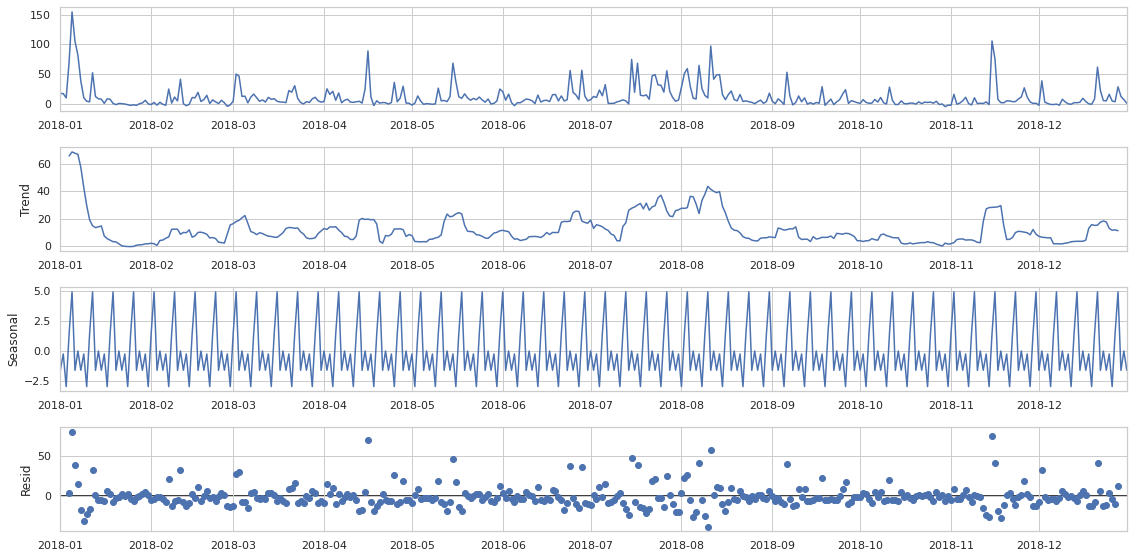

In [20]:
plt.rc('figure',figsize=(16,8)) # cambiamos el default seteado en plt.rcParams
plt.rc('font',size=15)

result = seasonal_decompose(data,model='additive')
fig = result.plot()

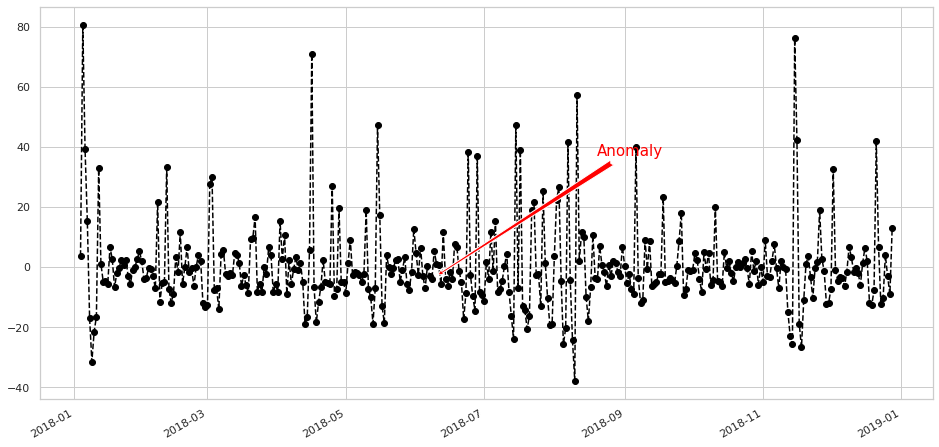

In [21]:
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)

fig, ax = plt.subplots()
x = result.resid.index
y = result.resid.values
ax.plot_date(x, y, color='black',linestyle='--')

ax.annotate('Anomaly', (mdates.date2num(x[160]), y[35]), xytext=(160, 120), 
           textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))

fig.autofmt_xdate()
plt.show()

continuar: este modelo aun no muestra anomalies???